In [1]:
from transformers import GPT2LMHeadModel
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model_hf.state_dict()

In [3]:
for k, v in sd_hf.items():
  print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
print(sd_hf["transformer.wpe.weight"].view(-1).shape)
sd_hf["transformer.wpe.weight"].view(-1)[:20]

torch.Size([786432])


tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

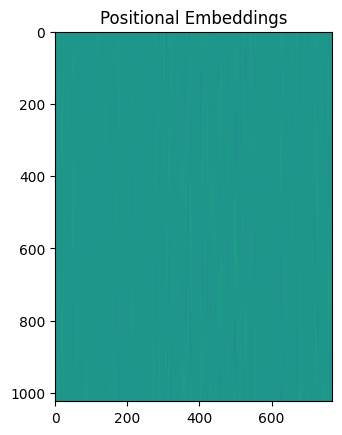

In [5]:
import matplotlib.pyplot as plt

plt.imshow(sd_hf["transformer.wpe.weight"])
plt.title("Positional Embeddings")
plt.show()

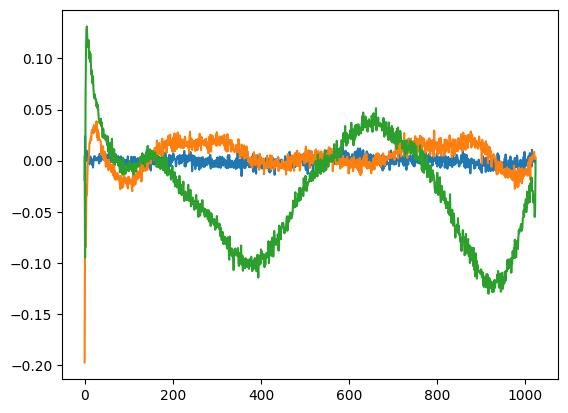

In [6]:
for i in range(3):
  plt.plot(sd_hf["transformer.wpe.weight"][:,i])

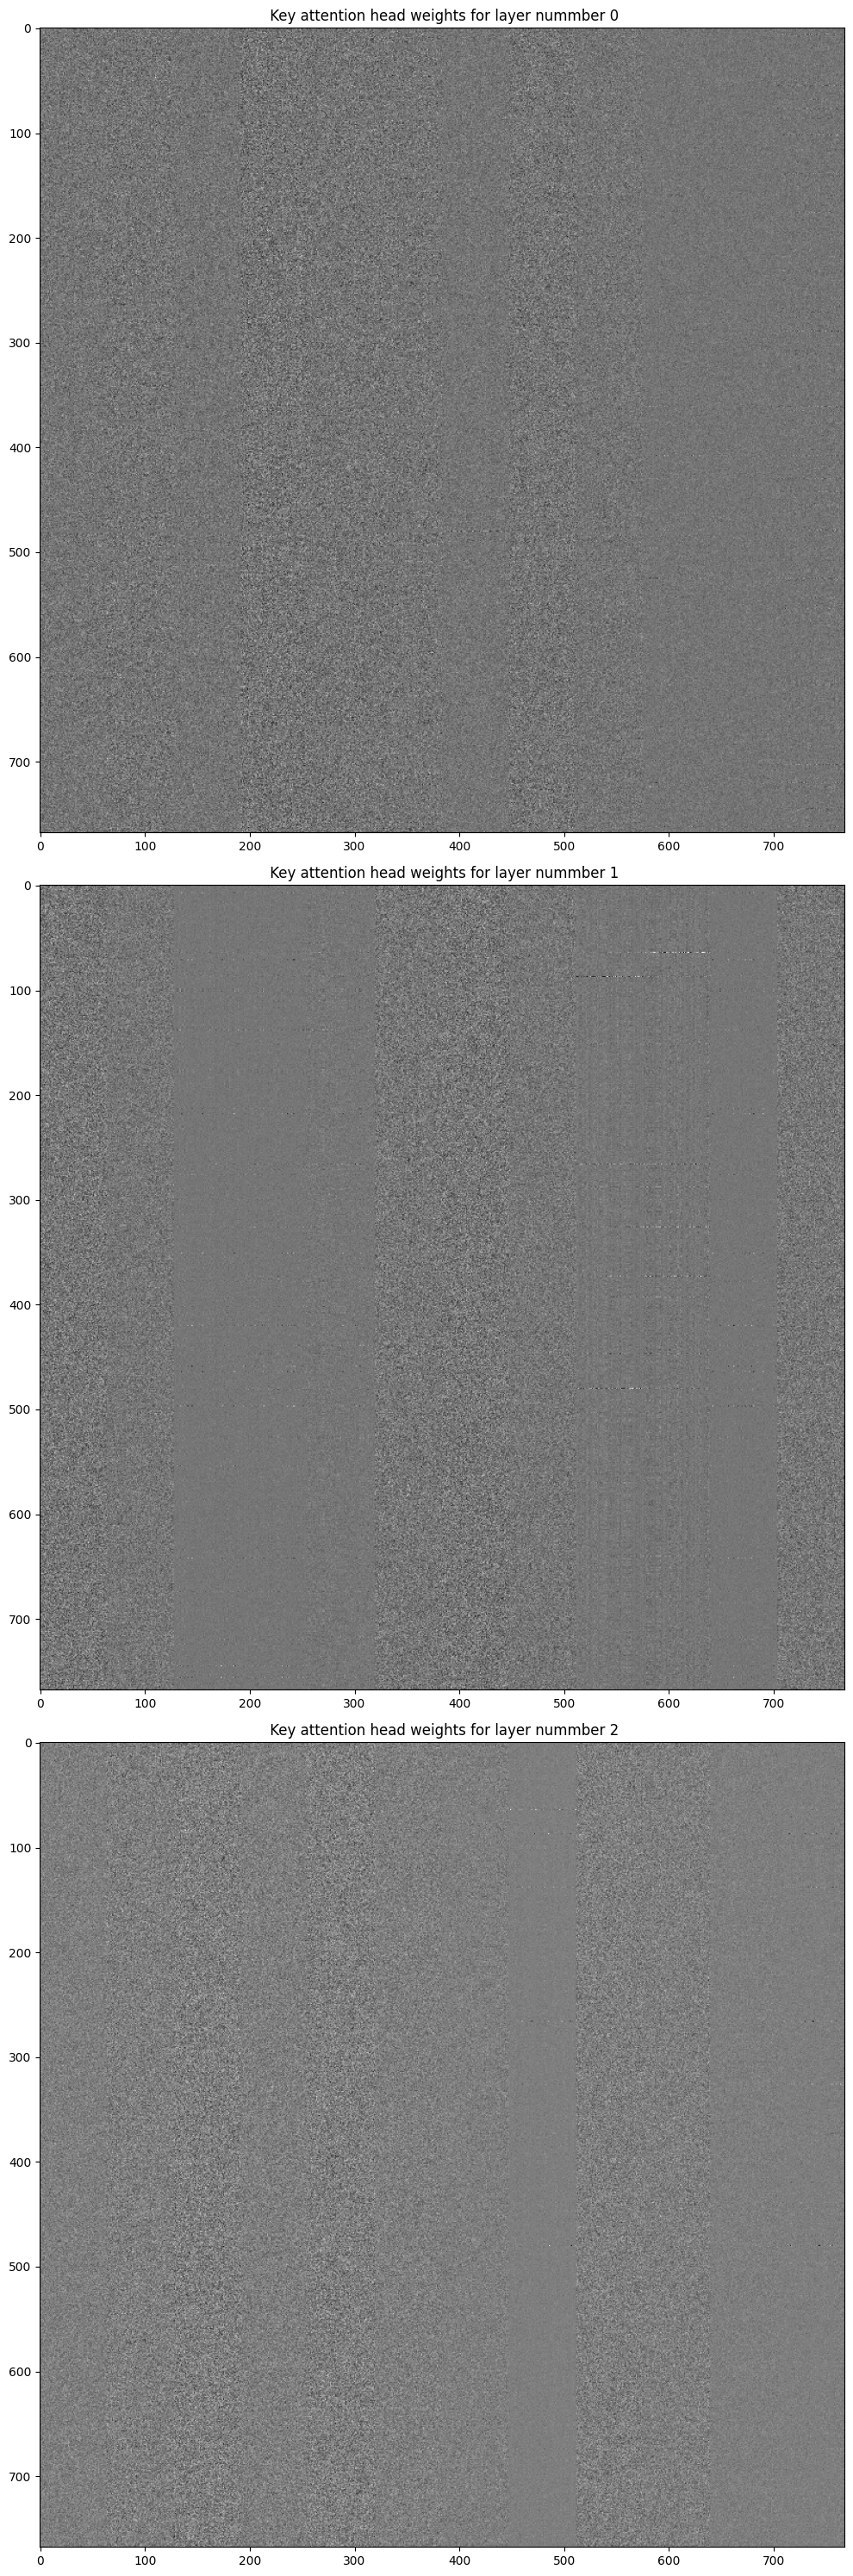

In [8]:
fig, axes = plt.subplots(3,1, figsize=(30,30))
for i in range(3):
  axes[i].imshow(model_hf.state_dict()[f"transformer.h.{i}.attn.c_attn.weight"][:, :768], cmap="gray")
  axes[i].set_title(f" Key attention head weights for layer nummber {i}")
plt.tight_layout()
plt.show()

In [9]:
model_hf.state_dict()["transformer.h.1.attn.c_attn.weight"][:, :768].shape

torch.Size([768, 768])

In [7]:
from transformers import pipeline, set_seed
generator = pipeline(task="text-generation", model="gpt2", truncation=True)
set_seed(42)
outputs = generator("Hello, I'm a model that can complete sentences. Watch me go!", max_length=50, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [8]:
for i in range(5):
  print(outputs[i]['generated_text'])

Hello, I'm a model that can complete sentences. Watch me go! I can do this. I can do anything…

So you're an expert. That's how much you can make from the time you get a job writing about your
Hello, I'm a model that can complete sentences. Watch me go! Now I wanna see how this looks.

HEREFORE I SHALL COOK AS WE SEE, THE END IS NOW AT CERN, AND I'VE GOT NO
Hello, I'm a model that can complete sentences. Watch me go! <pause> Do you like what I'm doing? Yeah? <pause> I'm making sure that that doesn't happen again. Do you like what my mouth is sucking
Hello, I'm a model that can complete sentences. Watch me go!
Hello, I'm a model that can complete sentences. Watch me go!
